In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !ls '/content/drive/My Drive/Datamining/data'

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file_name = '../../data/fd-export.csv'

## read file
df = pd.read_csv(file_name)
cond_file_name = '../../data/conditions_list.csv'
df_conditions = pd.read_csv(cond_file_name)
"""
    Function to remove abnormal age.
    This is required for reusability purpose.
    
    @Input : dataframe
    @Return : dataframe
"""
def remove_abnormal_age(df):
    df.age = df.age.fillna(-1)
    invalid_ids = set(df[ (df.age<0) | (df.age > 100) ].user_id.values)
    valid_df = df[~df.user_id.isin(invalid_ids)]
    
    print("Valid users with norma age = {}, Percentage {}".format( valid_df.user_id.unique().shape[0]
                                                                  , valid_df.user_id.unique().shape[0]/
                                                               float( df.user_id.unique().shape[0] ) ))
    
    return valid_df

## filter the user
df_processed = remove_abnormal_age(df)

df_processed.head(10)
    

/home/shibintv/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Valid users with norma age = 20456, Percentage 0.9268270581305786


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,31.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4
5,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3171,Condition,numbness in right hand,2
6,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,1356,Condition,Headache,2
7,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3172,Condition,pain in left ankle,1
8,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3173,Condition,pain in left leg,1
9,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3174,Condition,pain in joints on feet,2
10,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3175,Condition,neck and upper back pain,2


In [5]:


def filter_the_symptoms(df):
  symptoms = df[(df['trackable_type'] == "Symptom")].trackable_id.value_counts().sort_values(ascending = False)[:5000].index
  print(symptoms[0])
  df = df[df.trackable_id.isin(symptoms)]
  return df
df = filter_the_symptoms(df)

242


In [6]:
df.head(100)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,-1.0,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,31.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
6,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,1356,Condition,Headache,2
11,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3176,Condition,neck pain at base of scull,2
15,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,123,Symptom,Joint stiffness,3
...,...,...,...,...,...,...,...,...,...
125,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-07-19,56,Symptom,Diarrhea,3
126,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-07-19,197,Symptom,Stomach cramps,2
127,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-07-19,245,Symptom,mania,0
128,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,30.0,female,US,2015-07-19,246,Symptom,intrusive thoughts,0


In [7]:
df_conditions.sort_values(['Count']).tail(10)

,trackable_id,Count,Condition,New Name,Family,Group,Pot. Problem,Comments
68,82,1173,Asthma,Asthma,Immune,Allergy,X,NaN
224,14,1281,Ehlers-Danlos syndrome,Ehlers-Danlos syndrome,Genetic,Fatigue,X,NaN
229,12,1379,Endometriosis,Endometriosis,Reproductive,Pain,X,NaN
436,21,1466,Irritable bowel syndrome,IBS,Immune,Enteric,X,probably immune
365,56,1553,Headaches,Headache,Neural,Pain,NaN,NaN
514,13,2403,Migraine,Migraine,Neural,Pain,NaN,NaN
122,55,3220,Chronic fatigue syndrome,Chronic fatigue syndrome,Physical,Fatigue,NaN,NaN
275,20,3577,Fibromyalgia,Fibromyalgia,Neural,Pain,X,NaN
32,64,4028,Anxiety,Anxiety,Neural,Personality,X,NaN
178,11,4790,Depression,Depression,Neural,Mood,NaN,NaN


# Merge conditions

In [8]:
df_with_conds = pd.merge(df_processed, df_conditions, how ='left', on = 'trackable_id')

In [9]:
df_with_conds_unique = df_with_conds[df_with_conds.trackable_type == 'Condition'].drop_duplicates(['user_id', 'trackable_id'])

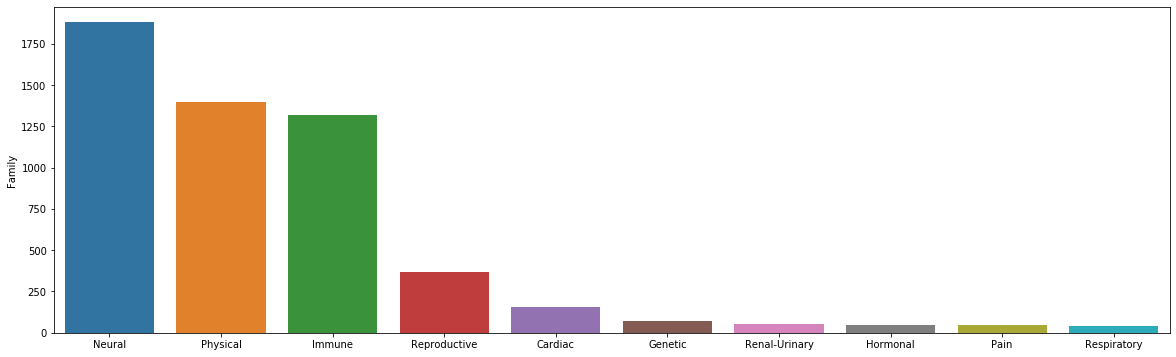

In [10]:
temp_df = df_with_conds_unique['Family'].value_counts().sort_values( ascending = False)[:10]
plt.figure(figsize=(20, 6))
sns_plt = sns.barplot(y = temp_df, x = temp_df.index)

# Prediction Task Below

In [11]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

df['checkin_date'] = pd.to_datetime(df['checkin_date'])

def combineConditions(x):
    return set(x)

def makeList(x):
    return list(x)

def numericOr(x):
    if 1 in x.values:
        return 1
    else:
        return 0
    
def reshapeSymptoms(df):
    #reshape and one-hot the symptoms

    symptoms = pd.get_dummies(df[(df['trackable_type'] == "Symptom") & (df['trackable_value'] != 0)], columns=['trackable_name'])
    symptoms = symptoms.drop(['trackable_id', 'trackable_type', 'trackable_value'], axis=1)
    symptoms = symptoms.groupby(['user_id', 'checkin_date']).agg(numericOr).reset_index()
    return symptoms
    
def createXY(df, symptoms):
    newdf = df[df['trackable_type'] == 'Condition'].groupby(['user_id', 'checkin_date'])['trackable_name'].agg(combineConditions).reset_index()
    newdf = newdf.merge(symptoms, on=['user_id','checkin_date'])

    #newdf = newdf.drop_duplicates().drop(['user_id','checkin_date','trackable_id','trackable_type', 'trackable_value'], axis=1)
    newdf = newdf.drop(['user_id','checkin_date'], axis=1)
    X = newdf.drop('trackable_name', axis=1)
    Y = newdf['trackable_name'].apply(makeList)  # each row of Y is a list, because this is a multilabel problem
    mlb = MultiLabelBinarizer()
    Y = mlb.fit_transform(Y)  
    return train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
symptoms = reshapeSymptoms(df)
symptoms.head(10)
# print(list(symptoms))
X_train, X_test, Y_train, Y_test = createXY(df, symptoms)


# PCA

In [ ]:
from sklearn.decomposition import PCA
import os
def do_pca(df_train, df_test, n_components = 50,save_folder = '../..//data'):
    
    pca = PCA(n_components = n_components)
    pca.fit(df_train)
    df_train = pca.transform(df_train)
    df_test = pca.transoform(df_test)
    
    
    pca_test_out_file = os.path.join(save_folder, 'pca_test.csv')
    pca_train_out_file = os.path.join(save_folder, 'pca_train.csv')
    
    df_train.to_csv(pca_train_out_file, index = False)
    df_test.to_csv(pca_test_out_file, index = False)
    return df_train, df_test



In [ ]:
## call pca
X_train, X_test= do_pca(X_train, X_test)

In [ ]:
X_train.show(100)

In [ ]:
# META CODE
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4))

# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 
# format before training.
# mlb = MultiLabelBinarizer()
# y = mlb.fit_transform(y)

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(Y_test, Y_Pred)

Final result